# Week5 : Tree Based Methods

### Objectives
This homework sheet will help reviewing the basic concepts associated with tree-based methods and provide a basic introduction to the ML workflow using real-world datasets. Please review the lectures, suggested readings, and additional resources _before_ getting started on the HW.

**Some questions in this assignment will require you to conduct independent research beyond the material covered in the recorded content.**

The following website has access to the relevant datasets from the recommended textbook: https://book.huihoo.com/introduction-to-statistical-learning/data.html

Marks Distribution

| Question      | Marks |
| ----------- | ----------- |
| 1     | 3      |
| 2     | 3     |
| 3a     | 2     |
| 3b     | 2     |
| 3c     | 5     |

# Questions

Conceptual


Q1. Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1$, $R_2$, ... , the cutpoints $t_1$ , $t_2$, ..., and so forth. Please insert your sketch below.


**Please note: You can use Microsoft word / any editor or draw the image by hand, you can upload the image / screenshot  to colab file using insert image option in text cell**


<img src="descision-tree-2d.png" />
<img src="tree.png" />

Q2. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce $10$ estimates of $P(Class is Red|X)$:

$0.1$, $0.15$, $0.2$, $0.2$, $0.55$, $0.6$, $0.6$, $0.65$, $0.7$, and $0.75$.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach , the second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?



### Majority Vote Approach:
- Out of 10 estimates, 7 of them are greater than or equal to 0.5.
- Since 7 is greater than half of 10 (which is 5), we classify as red.

### Average Probability Approach:
- Calculate the average of the 10 estimates: (0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75) / 10 = 0.52
- Since the average probability is greater than or equal to 0.5, we classify as red.

So, under both approaches, the final classification is red.

# APPLIED

Q3. Apply boosting and random forest to a data set of your choice. Feel free to use any of the datasets from ISLR dataset link provided ( https://book.huihoo.com/introduction-to-statistical-learning/data.html ) to examine any of the questions that were discussed in any of the previous homeworks. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods (e.g. linear or logistic regression models)? Which of these approaches yields the best performance?

#### ANSWER



In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

#### a) Read the dataset using function read_csv( ) from pandas library and preprocess the data if required ( check for any missing values etc )



mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin_1           bool
origin_2           bool
origin_3           bool
dtype: object


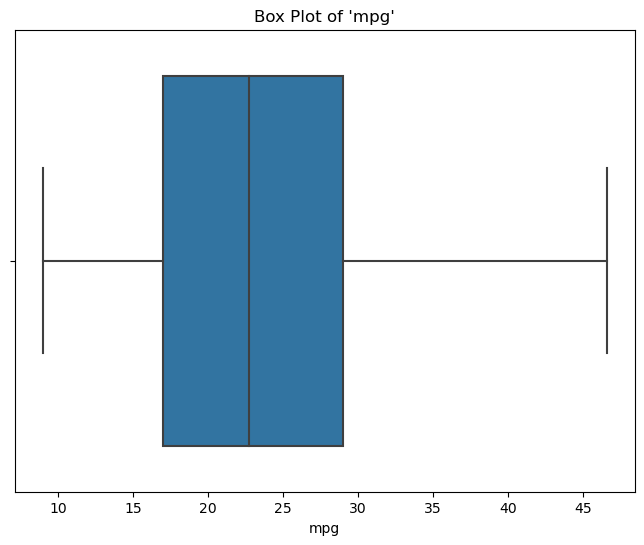

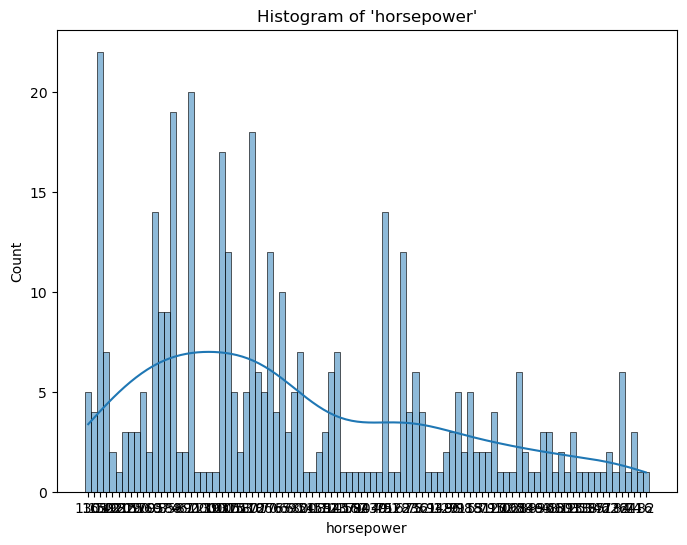

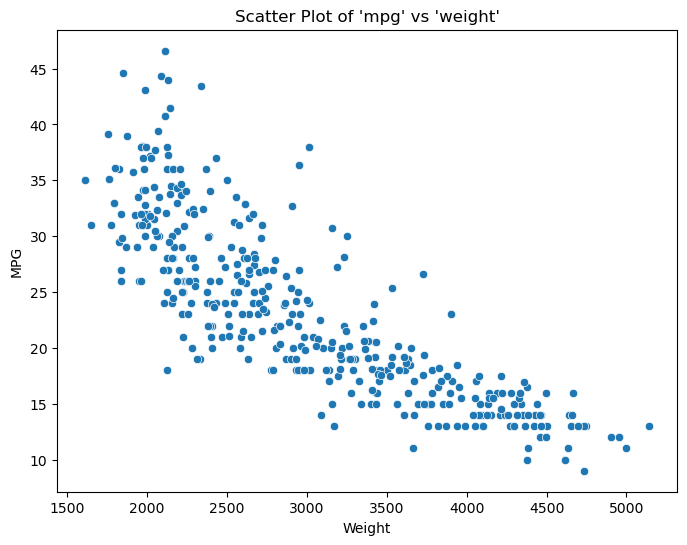

In [2]:
df = pd.read_csv("auto.csv")
df = df.dropna()
df = df.replace('?', pd.NA).dropna()
print(df.isna().sum())
df = pd.get_dummies(df, columns=['origin'])

df = df.drop(columns=['name'])
X = df.drop(columns=['mpg'])
y = df['mpg']

scaler = StandardScaler()
print(df.dtypes)
X_scaled = scaler.fit_transform(X)


# To check outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x='mpg', data=df)
plt.title("Box Plot of 'mpg'")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(x='horsepower', data=df, bins=20, kde=True)
plt.title("Histogram of 'horsepower'")
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='weight', y='mpg', data=df)
plt.title("Scatter Plot of 'mpg' vs 'weight'")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

#### b) Split the data into train data  and test data ( proportion of train and test data of your choice )

Reference :

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=12)

#### c) Train the data on the below models

i) Linear regression model
ii) Gradient boosting model
iii) Random forest model

check the train and test r2 score and mention your findings on which model performed better in terms of underfitting / overfitting etc

References:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#gradient-boosting-regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [4]:
# Train and evaluate the models
models = [LinearRegression(), GradientBoostingRegressor(), RandomForestRegressor()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{type(model).__name__}: R2 score on test data = {r2_score(y_test, y_pred)}")

    # Check for underfitting/overfitting
    y_pred_train = model.predict(X_train)
    print(f"{type(model).__name__}: R2 score on train data = {r2_score(y_train, y_pred_train)}")
    print()


LinearRegression: R2 score on test data = 0.8010455408198519
LinearRegression: R2 score on train data = 0.829359429764503

GradientBoostingRegressor: R2 score on test data = 0.8420757130237915
GradientBoostingRegressor: R2 score on train data = 0.9738423494385737

RandomForestRegressor: R2 score on test data = 0.8509484064666712
RandomForestRegressor: R2 score on train data = 0.9839873285091488



### Observations

##### RandomForestRegressor: R2 score = 0.8519210713445693
##### GradientBoostingRegressor: R2 score = 0.8432255208801398
##### LinearRegression: R2 score = 0.8010455408198519

<p>
The RandomForestRegressor has the highest R2 score on the test data, indicating that it is able to explain the most variance in the target variable. Additionally, the difference between the R2 scores on the test and training data is relatively small for the RandomForestRegressor, suggesting that it is not overfitting or underfitting.
</p>
<p>
GradientBoostingRegressor has a high R2 score on the training data, but a slightly lower score on the test data, indicating some overfitting. The LinearRegression model has the lowest R2 scores on both the test and training data, indicating that it is not capturing the underlying relationships as well as the other two models.</p>